In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/music_genre.csv", index_col=0)

df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,,,,,,,,,,,,,,,,,
32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop


## Data description

- instance_id - id of a song
- artist_name - the name of the artist
- track_name - the name of the song
- popularity - value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is   based, in the most part, on the total number of plays the track has had and how recent those plays are.
- acousticness - a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- danceability - a value between 0.0 and 1.0 of how suitable the track is for dancing
- duration_ms - duration of a track in milliseconds
- energy - a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- instrumentalness - The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- key - the key of the track (C, C# ... B)
- liveness - Detects the presence of an audience in the recording. Form 0.0 to 1.0
- loudness - measure of how loud the track is. From -60 (silence) to 0 (max loudness without distortion)
- mode - mode of the track (Minor, Major)
- speechiness - detects the presence of spoken words in a track.
- tempo - tempo of the song in bpm
- obtained_date - date
- valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
- music_genre - genre of the track (target)

more info -> https://developer.spotify.com/documentation/web-api/reference/get-audio-features



## Removing the missing values

we have so much rows that we are just going to drop the ones with missing values

in the artist_name they are denoted as 'empty_field'

In [2]:
df[df['artist_name'] == 'empty_field']

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,,,,,,,,,,,,,,,,,
66905.0,empty_field,7th Sevens,50.0,0.02810,0.656,307328.0,0.653,0.858000,F#,0.1120,-11.883,Minor,0.0396,117.999,4-Apr,0.1990,Electronic
36047.0,empty_field,Revolution,34.0,0.02360,0.715,221050.0,0.978,0.000493,D,0.2160,-1.538,Major,0.3620,125.109,4-Apr,0.4180,Electronic
37340.0,empty_field,World (The Price Of Love) - [Radio Edit] [2015...,31.0,0.00350,0.595,222147.0,0.904,0.003780,D,0.0533,-6.805,Minor,0.0349,127.61,4-Apr,0.8410,Electronic
61549.0,empty_field,Down With Me - VIP,32.0,0.01390,0.498,-1.0,0.945,0.647000,F,0.3380,-0.003,Minor,0.1370,149.888,4-Apr,0.1790,Electronic
38747.0,empty_field,Olvidela Compa,44.0,0.15300,0.792,265133.0,0.549,0.379000,F,0.3430,-9.855,Major,0.0456,120.01299999999999,4-Apr,0.4760,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39113.0,empty_field,Undecided,50.0,0.05480,0.754,132414.0,0.840,0.000014,A,0.1500,-5.111,Major,0.3130,144.991,4-Apr,0.0397,Hip-Hop
37037.0,empty_field,What You Like (feat. Ty Dolla $ign & Wiz Khalifa),52.0,0.13300,0.867,-1.0,0.618,0.000002,B,0.1280,-4.956,Minor,0.0614,140.005,4-Apr,0.8570,Hip-Hop
48746.0,empty_field,Blast,51.0,0.12400,0.786,187027.0,0.738,0.000000,C,0.1400,-5.621,Major,0.3890,93.758,4-Apr,0.7800,Hip-Hop


in the tempo they are denoted as '?'

In [3]:
df[df['tempo'] == '?']

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,,,,,,,,,,,,,,,,,
89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.6140,Electronic
25836.0,PEEKABOO,Arrival,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,4-Apr,0.1380,Electronic
27048.0,Fabian Mazur,If U Wanted To,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,?,4-Apr,0.2390,Electronic
55617.0,Wax Tailor,The Games You Play,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,4-Apr,0.7270,Electronic
69685.0,Dahu,Vessel,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,4-Apr,0.0618,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63058.0,Big Sean,Bigger Than Me,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,?,5-Apr,0.1440,Hip-Hop
53387.0,Millonario,Rayas de Patrón,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,?,4-Apr,0.8860,Hip-Hop
76585.0,MadeinTYO,I Want (feat. 2 Chainz),62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,?,4-Apr,0.2210,Hip-Hop


In [4]:
df['artist_name'] = df['artist_name'].replace('empty_field', np.nan)
df['tempo'] = df['tempo'].replace('?', np.nan)

df.dropna(inplace=True)

some songs have the duration of -1 ms so lets use IterativeImputer to fill in the blanks

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

df['duration_ms'] = df['duration_ms'].replace(-1,np.nan)

imputer = IterativeImputer(estimator=BayesianRidge(), random_state=42)

df['duration_ms'] = imputer.fit_transform(df[['duration_ms']])

df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,,,,,,,,,,,,,,,,,
32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,245345.369151,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.000000,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.000000,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.000000,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.000000,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,245345.369151,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.000000,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.000000,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop


Dropping the obtained_date

In [6]:
df.drop('obtained_date', inplace=True, axis=1)

df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
instance_id,,,,,,,,,,,,,,,,
32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,245345.369151,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.000000,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.000000,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.000000,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.000000,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,245345.369151,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,0.330,Hip-Hop
43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.000000,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.000000,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop


and finally change the tempo into a float

In [7]:
df['tempo'] = df['tempo'].apply(lambda x: float(x))

df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
instance_id,,,,,,,,,,,,,,,,
32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,245345.369151,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.000000,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.000000,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.000000,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.000000,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,245345.369151,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.028,0.330,Hip-Hop
43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.000000,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.043,0.113,Hip-Hop
39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.000000,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop


## Summary of some columns

In [8]:
numerical = df.select_dtypes(exclude=object).columns
categorical = df.select_dtypes(include=object).columns

print(numerical)
print(categorical)

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')
Index(['artist_name', 'track_name', 'key', 'mode', 'music_genre'], dtype='object')


In [9]:
df[numerical].describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,42791.000000,42791.000000,42791.000000,4.279100e+04,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000
mean,44.253651,0.306093,0.558745,2.453454e+05,0.600014,0.181925,0.194003,-9.123892,0.093788,119.960525,0.456574
std,15.554493,0.341026,0.178834,1.038672e+05,0.264107,0.325781,0.161704,6.142066,0.101285,30.666632,0.247185
min,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,34.000000,0.020100,0.443000,1.949620e+05,0.433000,0.000000,0.096900,-10.843000,0.036100,94.926500,0.258000
50%,45.000000,0.145000,0.569000,2.360400e+05,0.642000,0.000161,0.126000,-7.283000,0.049000,119.906000,0.448000
75%,56.000000,0.551000,0.687000,2.685870e+05,0.816000,0.155000,0.244000,-5.179500,0.099100,140.489000,0.648000
max,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


In [10]:
df[categorical].describe()

,artist_name,track_name,key,mode,music_genre
count,42791,42791,42791,42791,42791
unique,6602,36403,12,2,10
top,Nobuo Uematsu,Home,G,Major,Rock
freq,387,16,4873,27438,4344


In [11]:
def df_proportions(name):
    return df[name].value_counts(normalize=True).sort_values(ascending=False)

df_proportions('artist_name')

artist_name
Nobuo Uematsu              0.009044
Wolfgang Amadeus Mozart    0.008530
Ludwig van Beethoven       0.006707
Johann Sebastian Bach      0.006684
Frédéric Chopin            0.004954
                             ...   
The D.O.C.                 0.000023
Reykon                     0.000023
Ñejo                       0.000023
Yaga & Mackie              0.000023
Duki                       0.000023
Name: proportion, Length: 6602, dtype: float64

In [12]:
df_proportions('track_name')

track_name
Home                        0.000374
Forever                     0.000304
Dreams                      0.000280
Wake Up                     0.000280
Without You                 0.000257
                              ...   
Growing Pains III           0.000023
Barbie Doll                 0.000023
Drama (feat. Drake)         0.000023
Lovin' Me (feat. Smiggz)    0.000023
Strictly Bongo              0.000023
Name: proportion, Length: 36403, dtype: float64

In [13]:
df_proportions('key')

key
G     0.113879
C     0.110233
C#    0.108948
D     0.104578
A     0.097380
F     0.086373
B     0.075623
E     0.074876
G#    0.067631
A#    0.066696
F#    0.061976
D#    0.031806
Name: proportion, dtype: float64

In [14]:
df_proportions('music_genre')

music_genre
Rock           0.101517
Jazz           0.100909
Hip-Hop        0.100582
Country        0.100208
Rap            0.099811
Electronic     0.099741
Classical      0.099484
Anime          0.099413
Alternative    0.099273
Blues          0.099063
Name: proportion, dtype: float64

In [15]:
numerical

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

## Data visualization

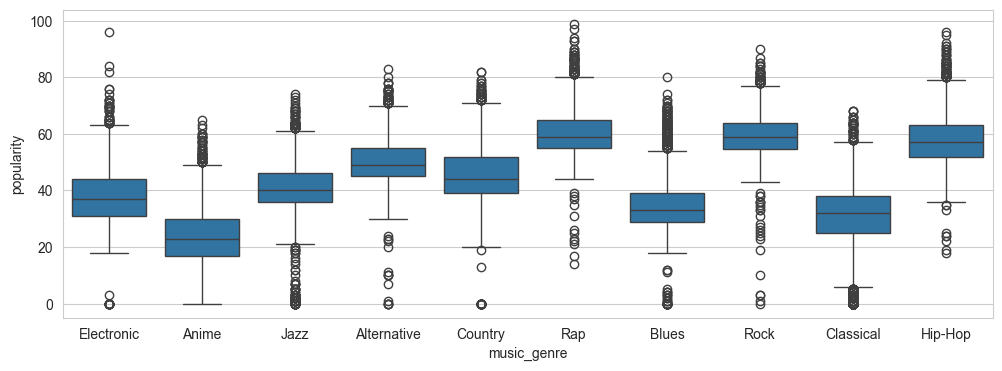

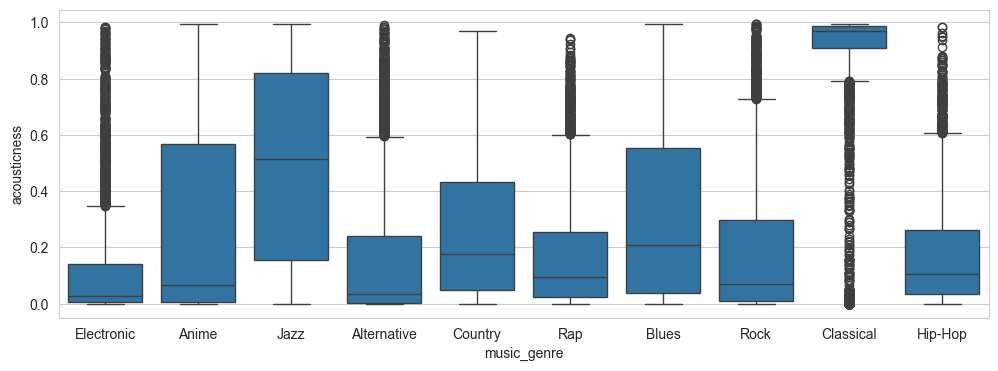

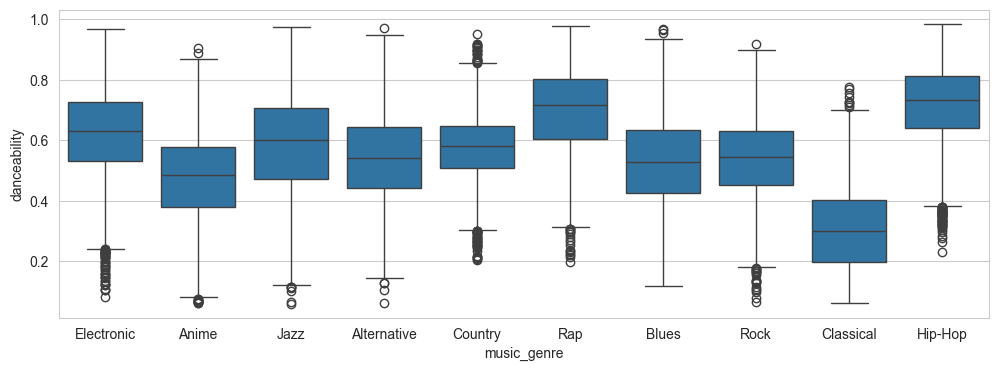

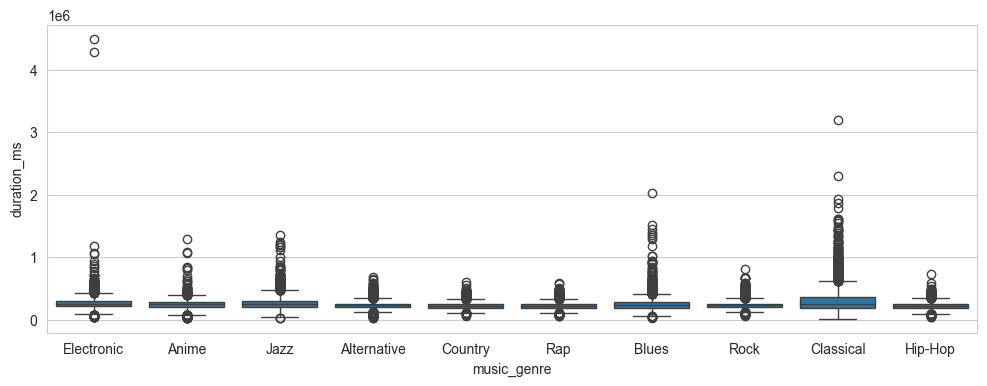

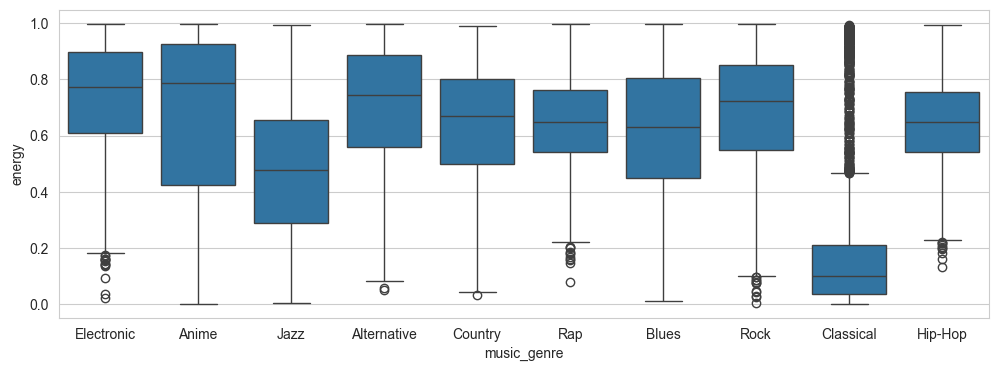

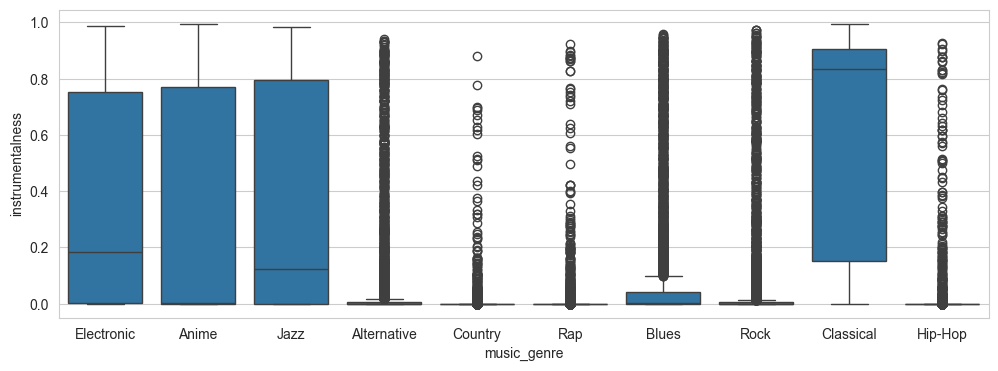

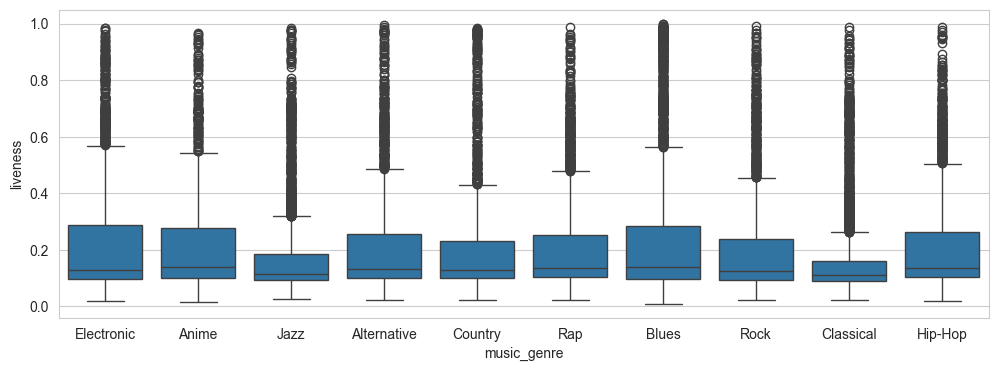

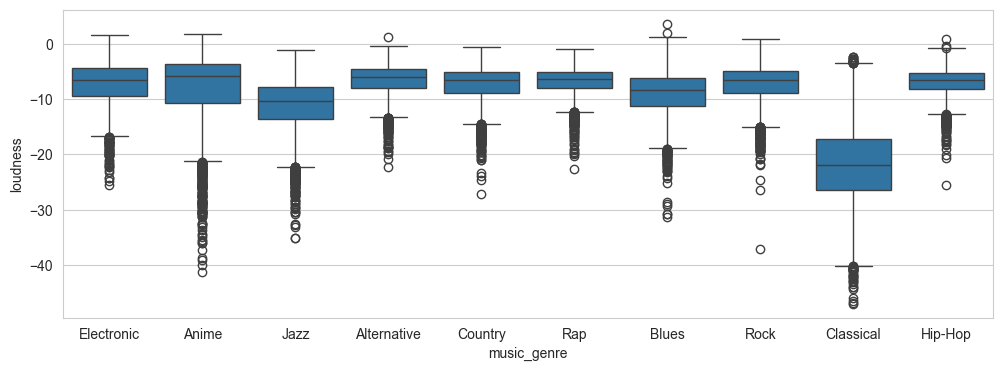

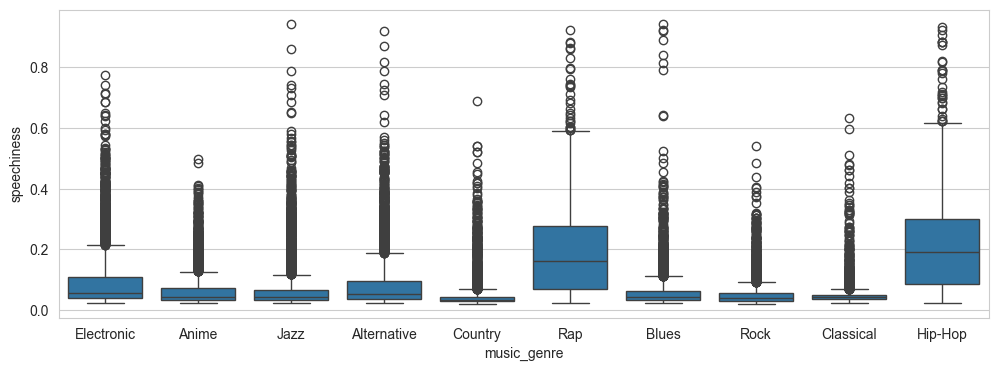

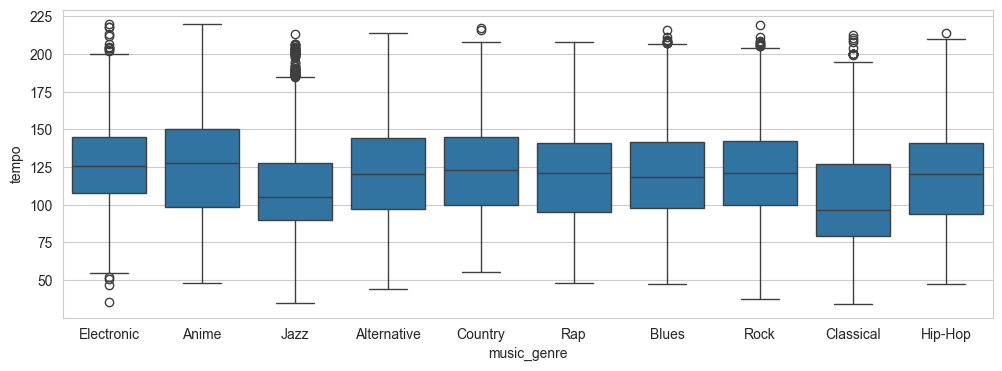

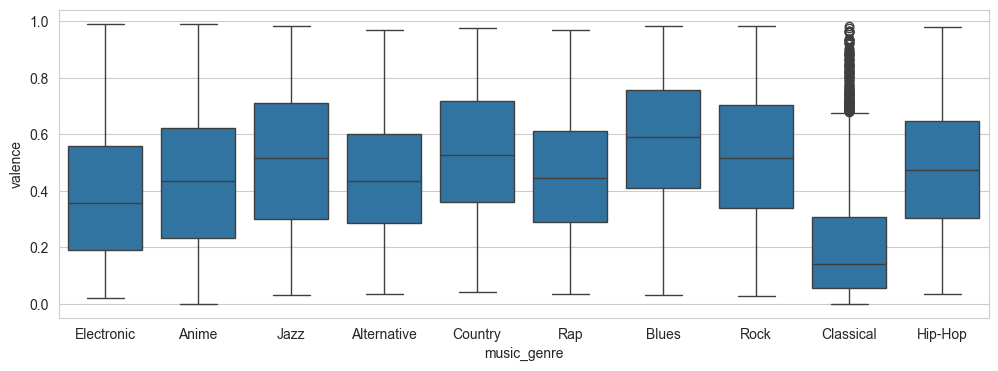

In [16]:
for col in numerical:
    plt.figure(figsize=(12,4))
    sns.boxplot(x='music_genre', y=col, data=df)
    plt.show()

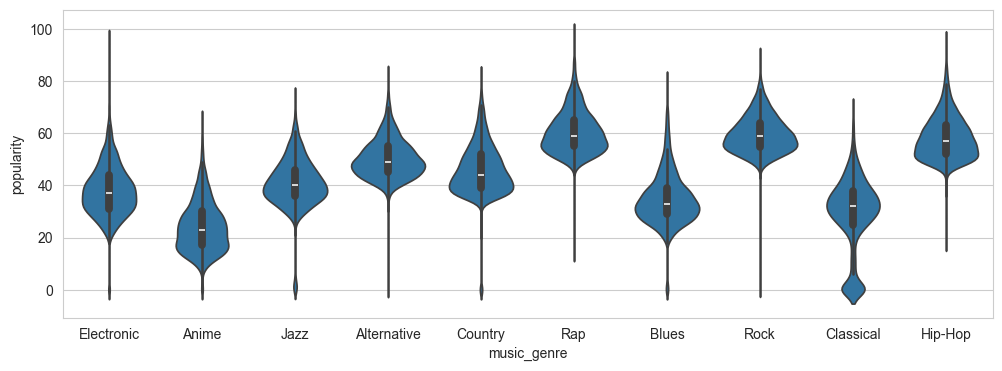

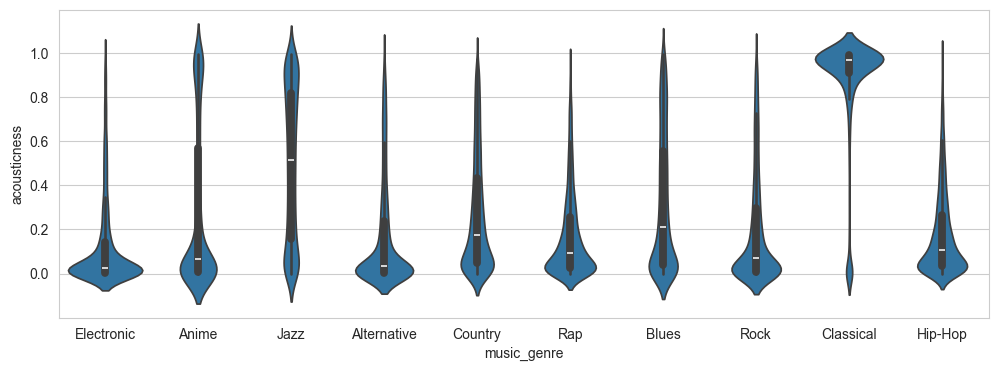

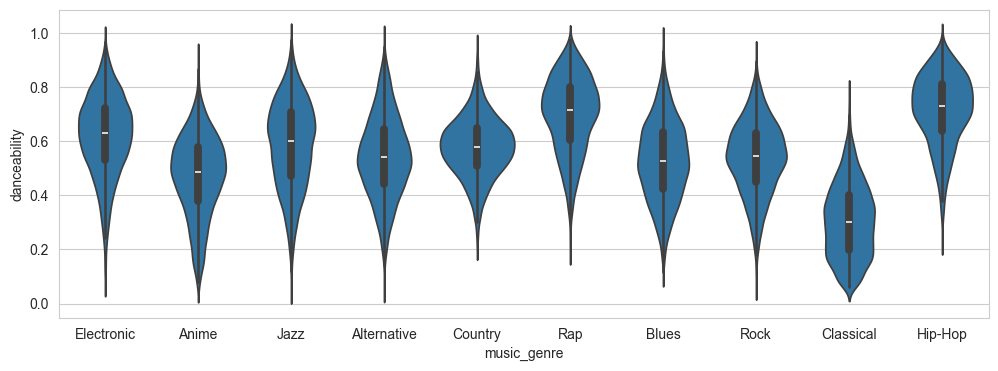

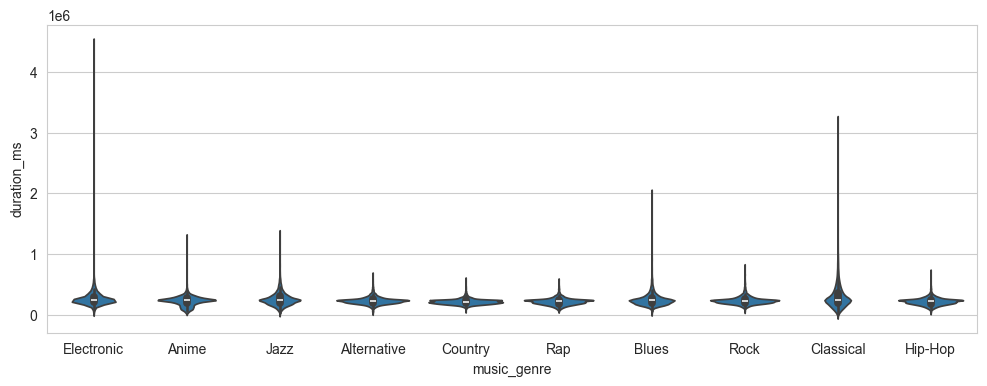

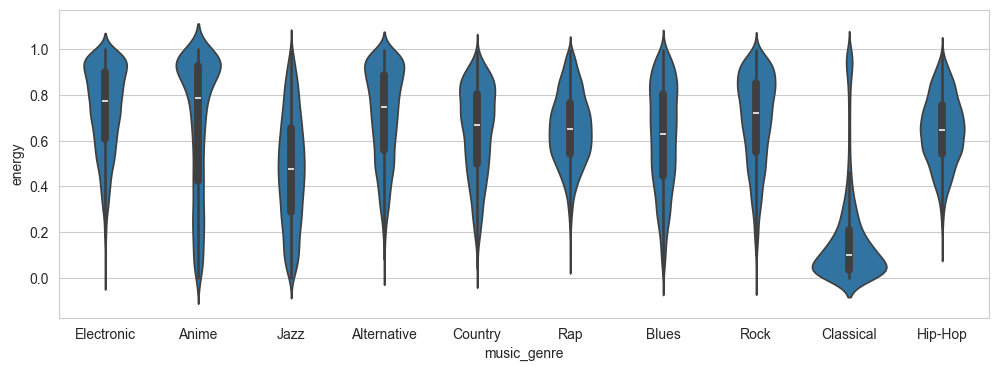

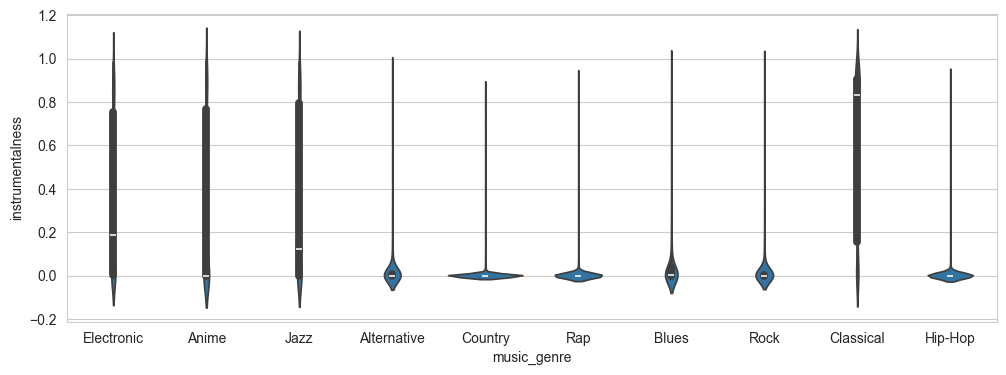

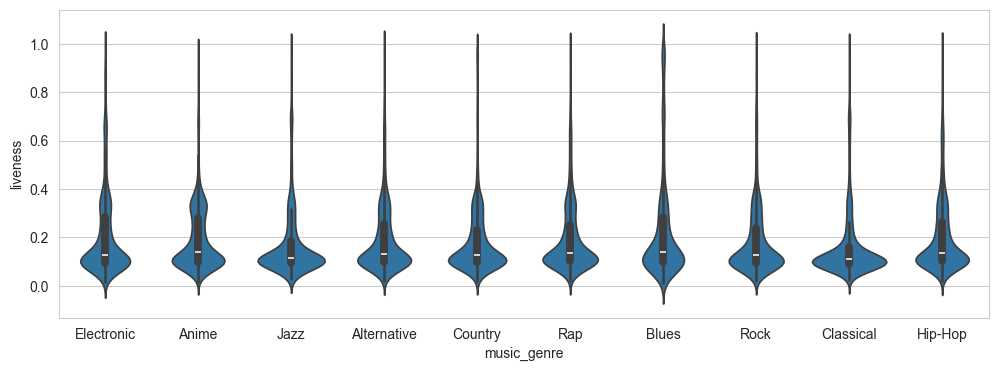

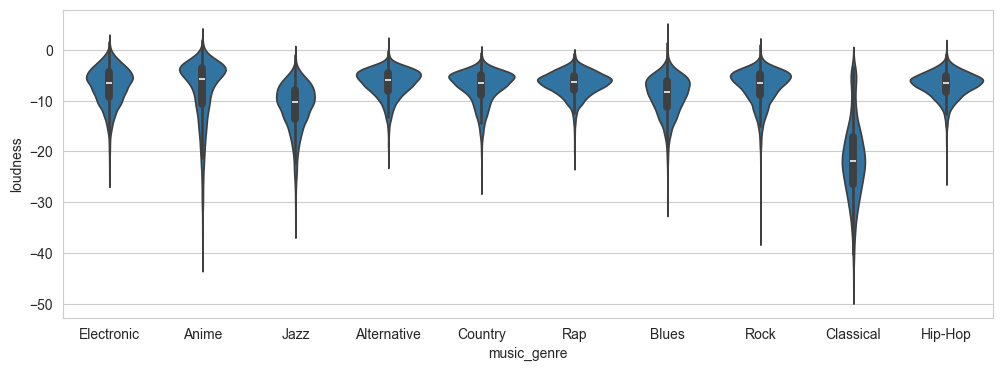

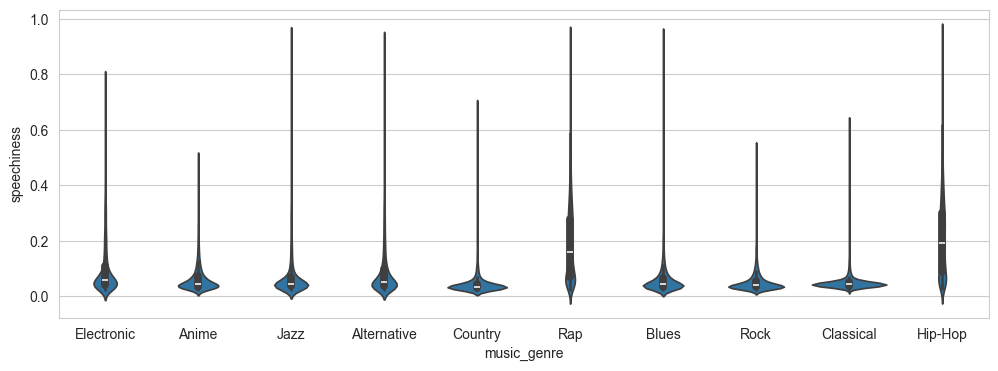

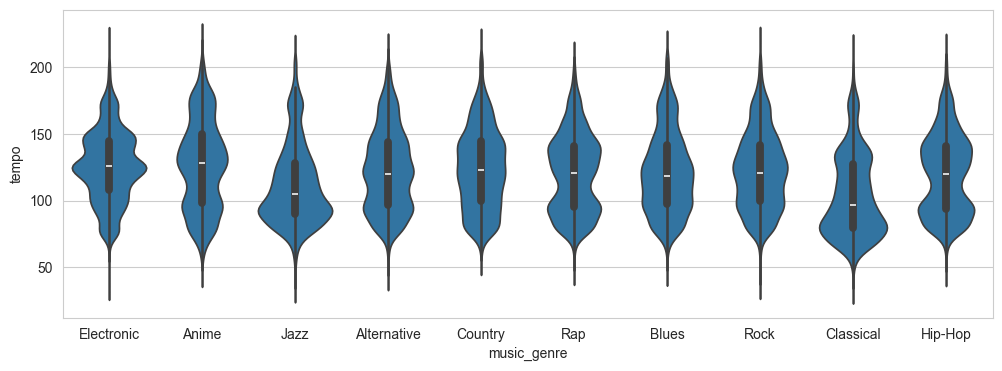

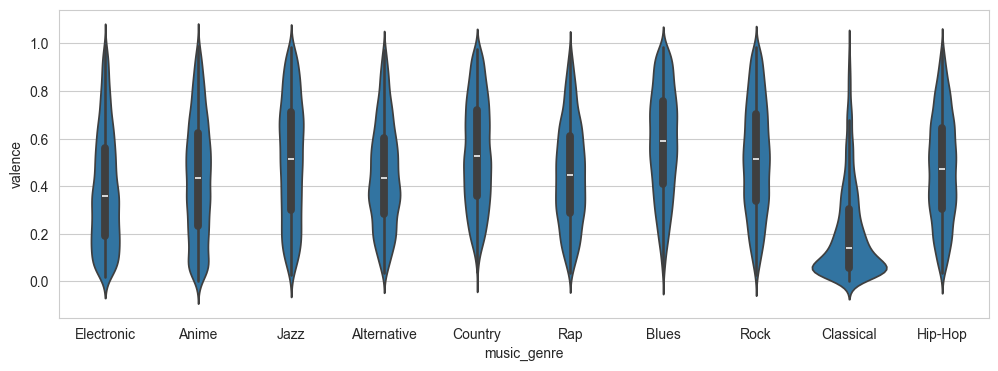

In [17]:
for col in numerical:
    plt.figure(figsize=(12,4))
    sns.violinplot(x='music_genre', y=col, data=df)
    plt.show()

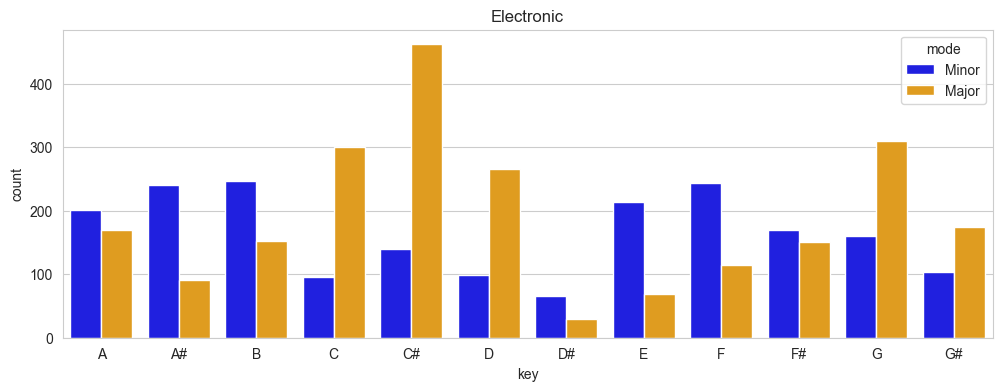

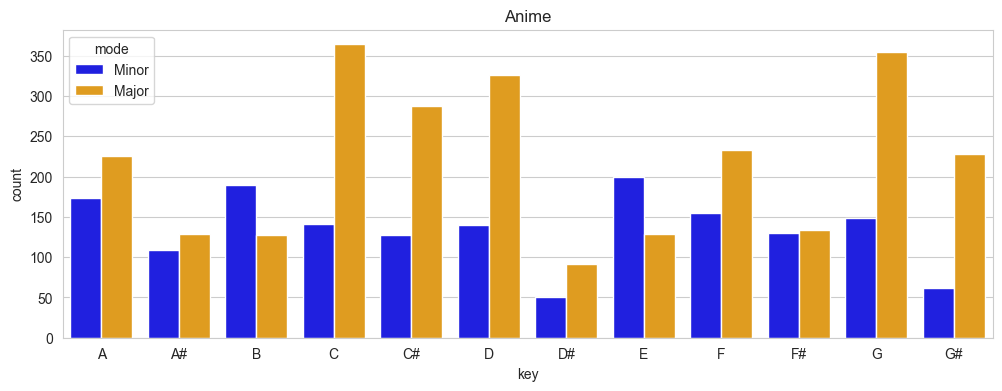

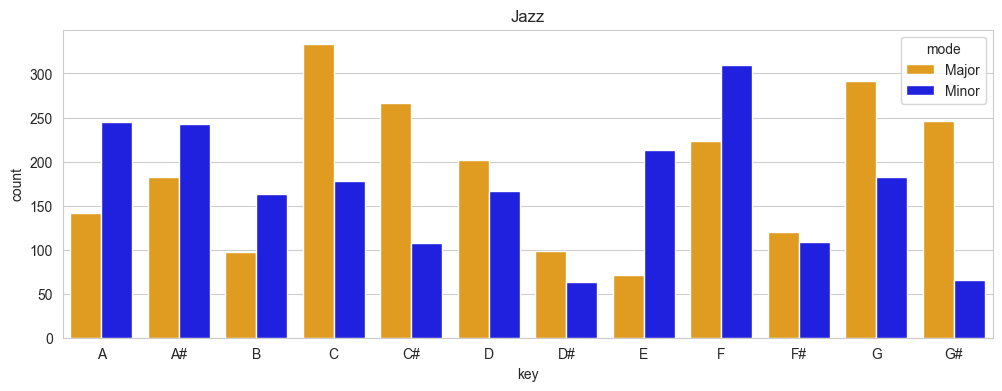

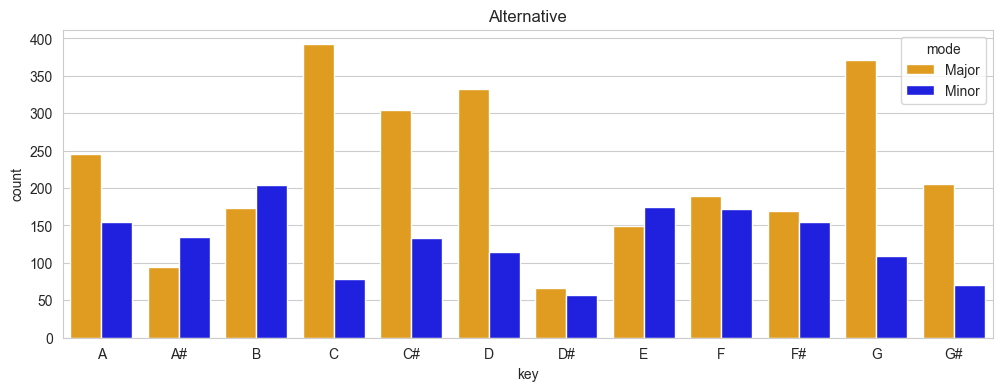

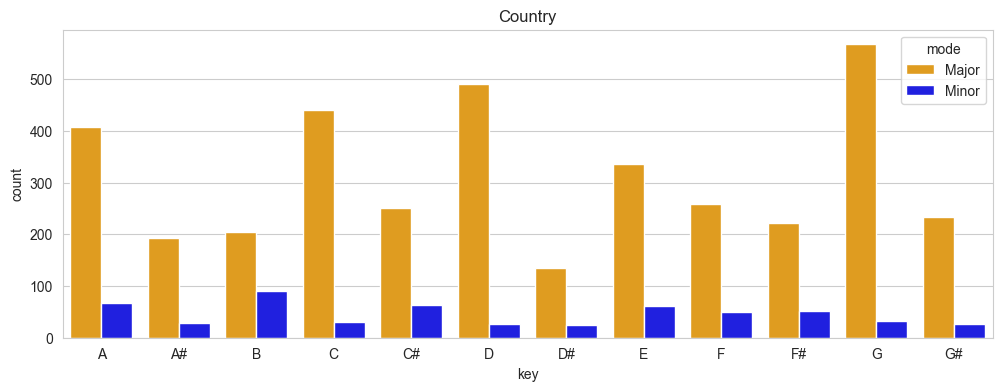

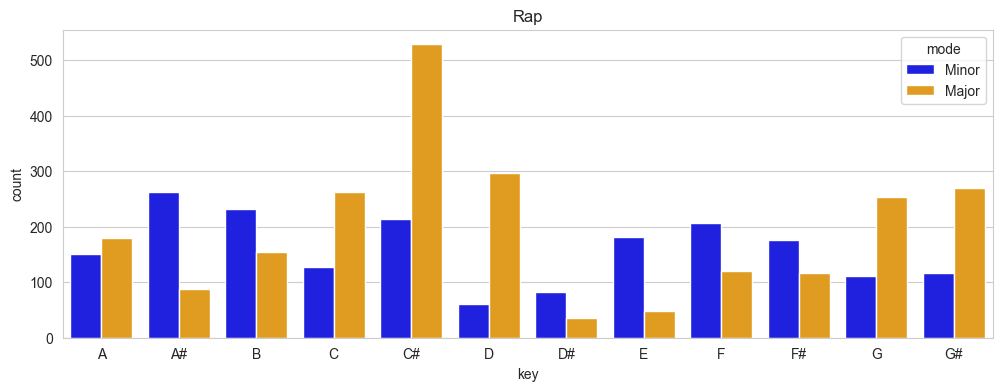

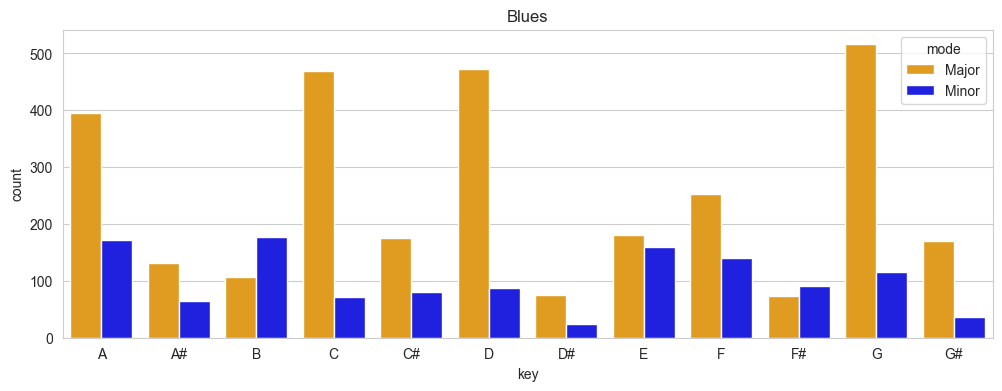

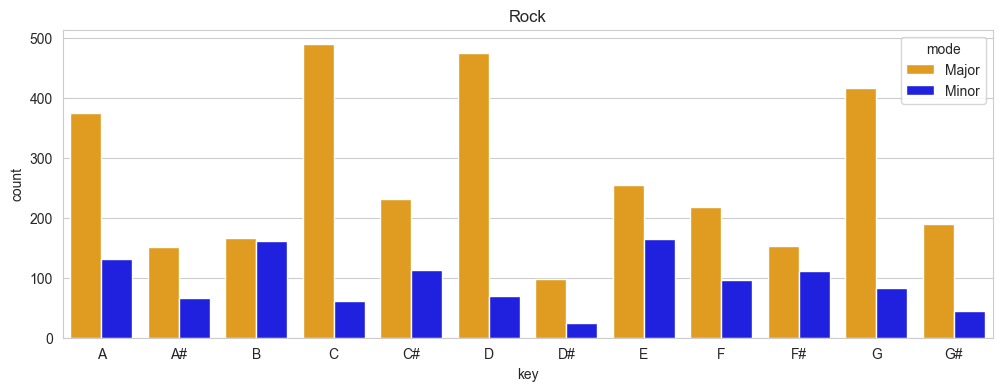

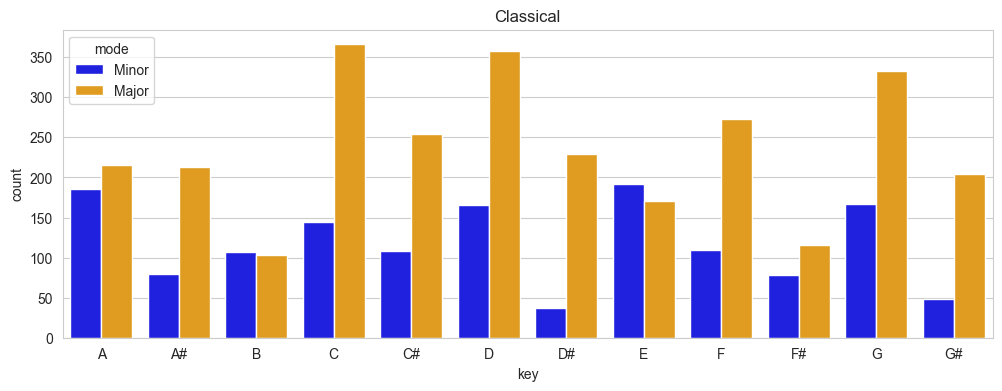

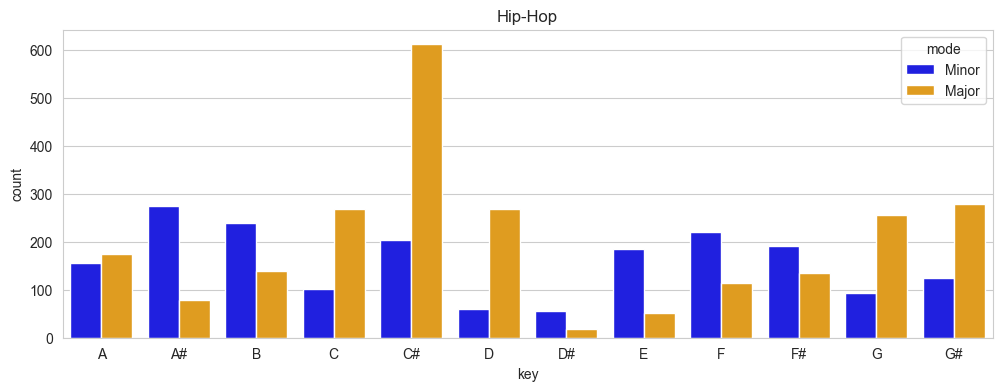

In [34]:
genres = df['music_genre'].unique()

mode_palette = {
    'Minor': 'blue',
    'Major': 'orange'
}

keys_order = df['key'].unique()
keys_order.sort()

for genre in genres:
    subset = df[df['music_genre'] == genre]

    plt.figure(figsize=(12,4))
    sns.countplot(data=subset,x='key',hue='mode', palette=mode_palette, order=keys_order)
    plt.title(genre)
    plt.show()